## Analysis for 

In [1]:
import pandas as pd
# SQLALchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

password = ''

#### Connect to Postgres SQL database

In [2]:
# Create an engine that can talk can talk to the database
engine = create_engine('postgresql://postgres:' + password + '@mypostgresdb.c9jigtwo0en4.us-east-2.rds.amazonaws.com:5432/my_data_class_db')
connection = engine.connect()

#### Read review data from SQL database

In [3]:
review_df = pd.read_sql('select * from review_id_table',connection)

In [4]:
review_df.head(10)

,review_id,customer_id,product_id,product_parent,review_date
0,R10005JR1IGG86,11648838,B006TZD3UE,901709591,2015-05-16
1,R1000B8KVRGOT6,44638290,B0055QMWQ4,198494984,2011-11-03
2,R1000CD3O7K5WJ,38782999,B001WAJ1VG,543653291,2013-12-30
3,R1000FU14WWHDX,42582359,B00685TZ7U,65032446,2014-10-12
4,R1000K64W2C84Z,48529991,B005XA6VNM,597885458,2012-07-25
5,R1000PP8QPZI4X,1377334,B0088UR61A,705684231,2014-07-13
6,R1000SBIDE1D05,10029085,B0081UZ1IM,966651038,2012-12-07
7,R1000SHT04I05Z,10989386,B00BC9ZCFQ,412268594,2013-08-04
8,R10010TBOVNUO4,17423394,B006MLAZ1U,215482165,2014-01-01
9,R10012XDTDWWNL,48076968,B007CLW9OU,442344843,2013-08-13


#### Read vine data from SQL database

In [5]:
product_vine_df = pd.read_sql('select * from vine_table',connection)

#### Merge vine and review product data

In [6]:
# join necessary dataframe to determine vine and other data analysis about the review
# joined review data and vine data 
joined_review_vine = review_df.merge(product_vine_df, how="inner")
joined_review_vine.head()

,review_id,customer_id,product_id,product_parent,review_date,star_rating,helpful_votes,total_votes,vine
0,R10005JR1IGG86,11648838,B006TZD3UE,901709591,2015-05-16,5,0,0,N
1,R1000B8KVRGOT6,44638290,B0055QMWQ4,198494984,2011-11-03,2,0,0,N
2,R1000CD3O7K5WJ,38782999,B001WAJ1VG,543653291,2013-12-30,2,0,0,N
3,R1000FU14WWHDX,42582359,B00685TZ7U,65032446,2014-10-12,4,0,0,N
4,R1000K64W2C84Z,48529991,B005XA6VNM,597885458,2012-07-25,4,0,0,N


#### Figure 1 - Analysis Scatter Plot

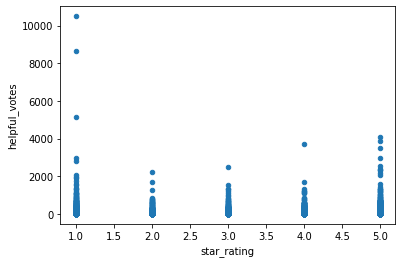

In [7]:
joined_review_vine.plot.scatter(x='star_rating',y='helpful_votes')

## Conclusion
A scatter plot was used to graph the joined_review_vine dataframe and the star_rating from our helpful_votes pretty much show us that there are two start ratings matters are the least from 1.0 to the best rating which is a 5.0. The other ratings are just noise. In conclusion, people will only view the worst to the very best when they are looking to make a purchase on Amazon.